# Netflix Movie Analysis
Netflix is known for its work in data science, AI, and ML, particularly for building strong recommendation models and algorithms that understand customer behavior and patterns. Suppose you are working in a data-driven job role, and you have a dataset of more than 9,000 movies. You need to solve the following questions to help the company make informed business decisions accordingly.
### Exploratory Data Analysis & Data Preprocessing

This project analyzes a Netflix-style movie dataset to uncover trends in movie releases, genres, popularity, and ratings using EDA and preprocessing techniques.

### Objective of the Analysis

The goal of this project is to:
- Understand trends in movie releases over the years
- Identify the most common movie genres
- Analyze popularity and rating distributions
- Prepare clean data for further analysis or modeling


## Questions to Answer

- Which genre appears most frequently in the dataset?
- Which genre has the highest number of votes / highest average rating?
- Which movie has the highest popularity and what is its genre?
- Which movie has the lowest popularity and what is its genre?
- Which year has the highest number of movie releases?
- What is the distribution of movie popularity in the dataset?
- Is there any relationship between movie popularity, votes, and release year?

In [91]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Load dataset 
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Initial Data Exploration

In [93]:
# Viewing shape 
df.shape

(9827, 9)

In [94]:
# Viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


- The dataset contains **no missing values (NaNs)**.
- The columns **Overview**, **Original_Language**, and **Poster_Url** are not useful for this analysis, so they can be removed.
- The **Release_Date** column should be converted to **datetime format**, and the **release year** should be extracted for trend analysis.

In [95]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [96]:
# Exploring genre column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [97]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#### • Exploration Summary

- The dataset contains **9,827 rows** and **9 columns**.
- There are **no missing values (NaNs)** and **no duplicate records**, indicating the dataset is already fairly clean.
- The `Release_Date` column should be converted to **datetime format**, and the **release year** should be extracted for analysis.
- The columns `Overview`, `Original_Language`, and `Poster_Url` are not very useful for this analysis and can be removed.
- The `Popularity` column contains **noticeable outliers**, indicating a right-skewed distribution.
- The `Vote_Average` column can be **categorized into bins** (optional) to simplify comparisons and analysis.
- The `Genre` column contains **comma-separated values** and extra **whitespace**, so it needs preprocessing (split + explode).

## Data Cleaning

Since the dataset contains **no missing values** and **no duplicate records**, the main cleaning step is to **remove irrelevant columns** that are not useful for this analysis.


In [98]:
# Drop Irrelevant Columns
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis= 1, inplace=True)

## Feature Engineering & Preprocessing


In [99]:
# Release_Date Conversion to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'] = df['Release_Date'].dt.year

We will split the `Genre` values into a list and then **explode** the DataFrame so that each row contains **only one genre per movie**.

In [100]:
# Genre Transformation
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

In [101]:
# Casting Genre column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

### Categorizing the `Vote_Average` Column

The `Vote_Average` column is binned into four categories (`popular`, `average`, `below_avg`, `not_popular`) using the `categorize_col()` function for easier analysis.


In [102]:
def categorize_col(df, col, labels):
    """
    Catigorizes a certain column based on its quartiles
    
    Arguments:
    (df) df - dataframe we are proccesing
    (col) str - to be catigorized column's name
    (labels) list - list of labels from min to max
    
    Returns:
    (df) df - dataframe with the categorized col
    """
    # setting the edges to cut the column accordingly
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
    
    df[col] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True, duplicates='drop')
    return df

# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column based on labels and edges
categorize_col(df, 'Vote_Average', labels)

# confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [103]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    7240
below_avg      6581
average        6432
popular        5540
Name: count, dtype: int64

In [104]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [105]:
# Checking total values in each column
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [106]:
df.shape

(25793, 6)

Now that the dataset is clean and tidy, we are left with **6 columns** and **25,793 rows** to use for further analysis.

## Exploratory Data Analysis (EDA)

- In this section, we visualize and analyze trends and patterns in the data.
- Here, we'd use Matplotlib and seaborn for making some informative visuals to gain insights abut our data.


In [20]:
# setting up seaborn configurations
sns.set_style('whitegrid')

## Q1: Which genre appears most frequently in the dataset?

In [21]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

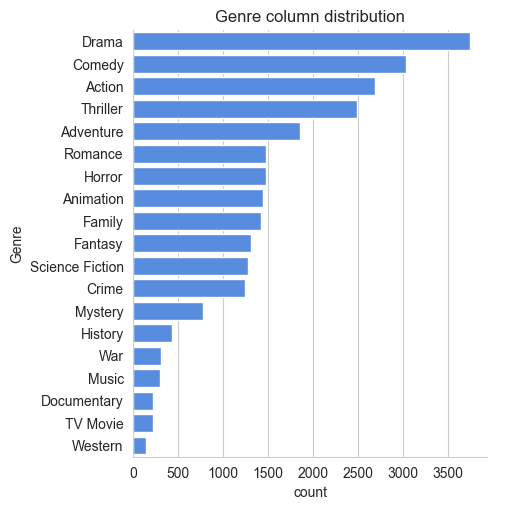

In [53]:
# Visualizing Genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
 order = df['Genre'].value_counts().index,
           color='#4287f5')
plt.title('Genre column distribution')
plt.show()

From the above visualization, we can observe that **Drama** is the most frequent genre in the dataset, accounting for **more than 14%** of all movies across **20 genres**.

## Q2: What is the highest average rating (Vote_Average)?

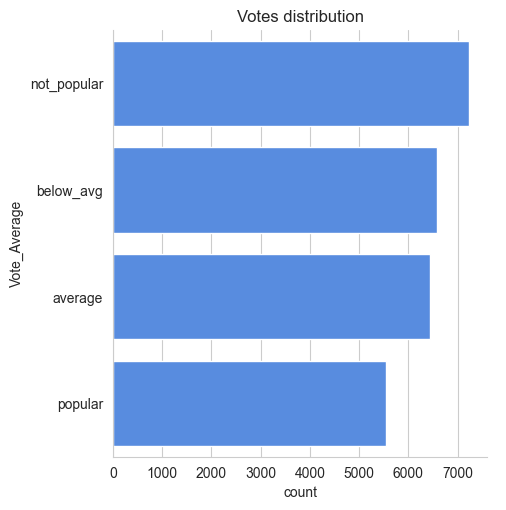

In [54]:
# Visualizing Vote_Average column
sns.catplot(y = 'Vote_Average', data = df ,kind = 'count', 
           order=df['Vote_Average'].value_counts().index, 
           color='#4287f5')
plt.title('Votes distribution')
plt.show()

From the above chart, we can observe that the **`not_popular` category contains the highest number of movies**, meaning most movies fall into the lower rating range.

## Q3: Which movie has the highest popularity, and what is its genre?

In [55]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


From the analysis, **Spider-Man: No Way Home** has the **highest popularity** among all movies in the dataset. It belongs to the genres **Action**, **Adventure**, and **Science Fiction**.

## Q4: Which movie has the lowest popularity, and what is its genre?

In [56]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


From the analysis, **The United States vs. Billie Holiday** and **Threads** have the **lowest popularity** scores in the dataset. Their genres include **Music**, **Drama**, **History**, **War**, and **Science Fiction**.

## Q5: Which year has the highest number of movie releases?

In [57]:
df['Release_Date'].value_counts()

Release_Date
2021    1638
2018    1387
2017    1365
2019    1272
2016    1212
        ... 
2024       4
1902       3
1925       2
1929       2
1930       2
Name: count, Length: 102, dtype: int64

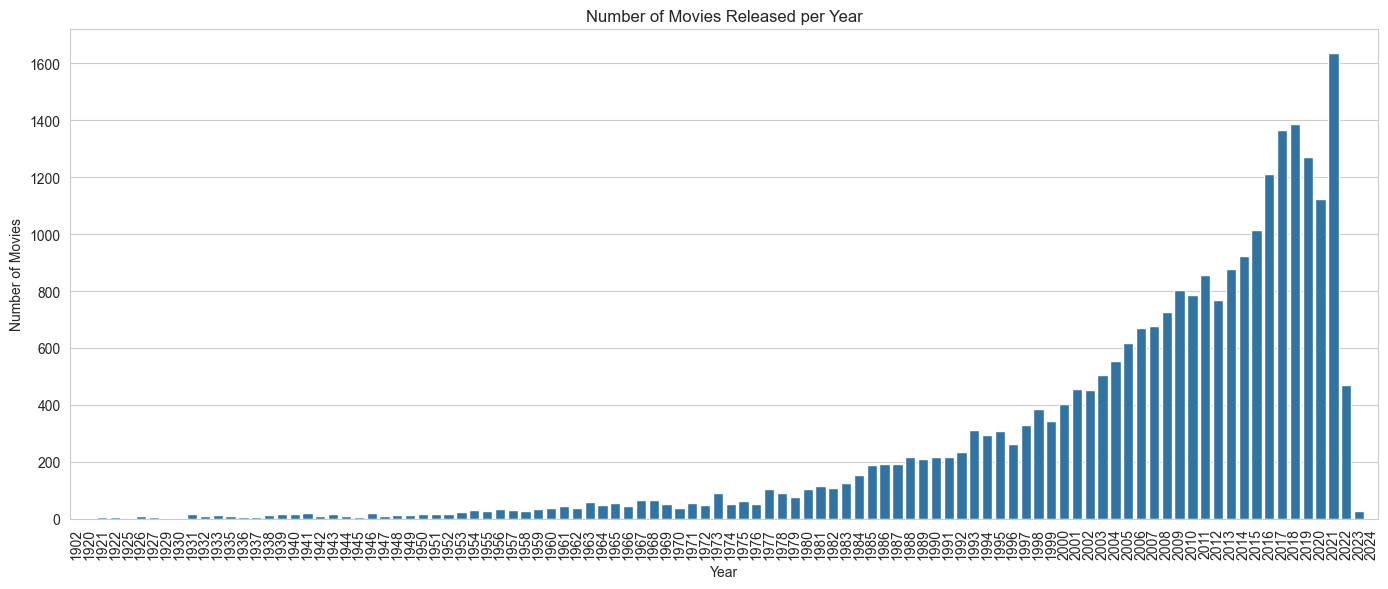

In [73]:
# Visulizing Release_Date column
year_counts = df['Release_Date'].value_counts().sort_index()  # sorted by year

plt.figure(figsize=(14,6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

The number of movies released per year shows a clear **upward trend over time**. Movie releases remain very low in the early years but start increasing significantly after the 2000s. The highest number of releases occurs in **2021**, indicating that most movies in this dataset are from year 2021


## Q6: What is the distribution of movie popularity in the dataset?

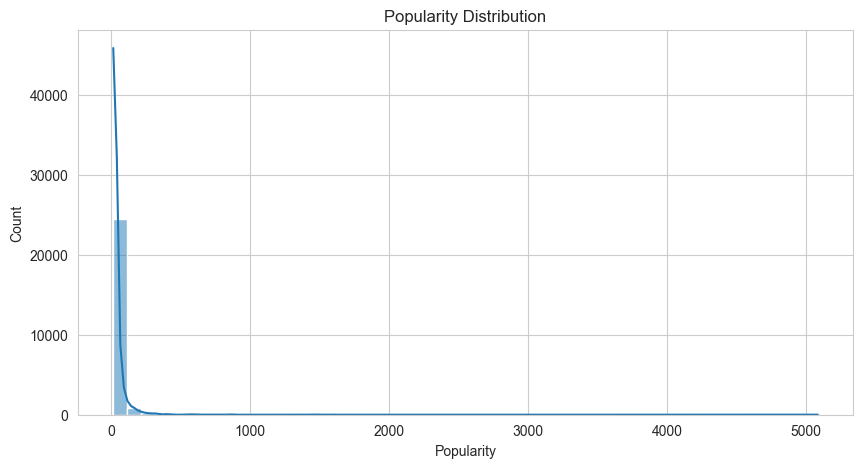

In [67]:
plt.figure(figsize=(10,5))
sns.histplot(df['Popularity'], bins=50, kde=True)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

The popularity distribution is **right-skewed**, meaning most movies have **low to moderate popularity**, while only a few movies have **very high popularity**. These high-popularity movies act as **outliers**, which increases the maximum value and makes the distribution uneven.


## Q7: Is there any relationship between movie popularity, votes, and release year?

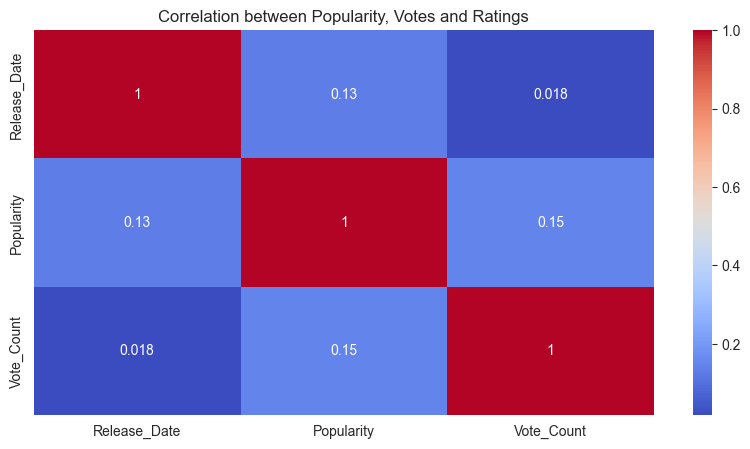

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Popularity, Votes and Ratings")
plt.show()


- **Popularity vs Vote_Count (0.15):** Weak positive correlation → movies with more votes are slightly more popular, but votes alone do not strongly explain popularity.
- **Popularity vs Release_Date (0.13):** Weak positive correlation → newer movies tend to have slightly higher popularity.
- **Vote_Count vs Release_Date (0.018):** Almost no correlation → movie age does not significantly impact vote count.

## Key Insights

- **Drama** is the most frequent genre in the dataset, making it the dominant category among all listed genres.
- The number of movies released shows a strong increasing trend in recent years, with **[TOP YEAR]** having the highest number of movie releases.
- Movie popularity scores are **right-skewed**, meaning most movies have **low to moderate popularity**, while only a few movies achieve extremely high popularity (outliers).
- **Spider-Man: No Way Home** has the **highest popularity** in the dataset and belongs to multiple genres (Action, Adventure, Science Fiction).
- The movie(s) with the **lowest popularity** belong to multiple genres, showing that low popularity is not limited to a single genre.
- The correlation analysis indicates **weak relationships** between features:
  - **Popularity and Vote_Count** show a weak positive correlation → higher votes can slightly increase popularity.
  - **Popularity and Release_Date** show a weak positive correlation → newer movies tend to be slightly more popular.
  - **Vote_Count and Release_Date** have almost no correlation → being newer does not guarantee more votes.
- Overall, **popularity is influenced by multiple factors**, not just votes or release timing.


## Next Steps

- Build a movie recommendation system using genre and ratings
- Perform correlation analysis between popularity, vote count, and ratings
- Apply machine learning to predict popularity or rating categories

This analysis demonstrates effective data cleaning, preprocessing, and exploratory analysis on a real-world movie dataset. The cleaned dataset can now be used for further modeling or recommendation systems.